In [75]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
# mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [76]:
gdf = gpd.read_file('data/2000/A002005212000DDSWC12.zip')

In [77]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6179 entries, 0 to 6178
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6179 non-null   object  
 1   PREF        6179 non-null   object  
 2   CITY        6179 non-null   object  
 3   S_AREA      6179 non-null   object  
 4   PREF_NAME   6179 non-null   object  
 5   CITY_NAME   6179 non-null   object  
 6   S_NAME      6175 non-null   object  
 7   KIGO_E      917 non-null    object  
 8   HCODE       6179 non-null   int64   
 9   AREA        6179 non-null   float64 
 10  PERIMETER   6179 non-null   float64 
 11  h12kaxx_    6179 non-null   float64 
 12  h12kaxx_ID  6179 non-null   float64 
 13  KEN         6179 non-null   object  
 14  KEN_NAME    6179 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  DUMMY1      0 non-null      float64 
 17  GST_NAME    6179 non-null   object  
 18  CSS_NAME    1887 non-null   object  
 19

In [78]:
gdf.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,MOJI,SEQ_NO2,KSUM,CSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,121010010,12,101,001000,千葉県,中央区,青葉町,NaN,8101,730719.942,...,青葉町,4078.0,15,18,870.0,314.0,140.14021,35.59712,0010-00,"POLYGON ((140.13408 35.60146, 140.13441 35.601..."
1,121010020,12,101,002000,千葉県,中央区,赤井町,NaN,8101,1369408.223,...,赤井町,4169.0,15,15,824.0,275.0,140.16120,35.57165,0020-00,"POLYGON ((140.16880 35.57623, 140.16886 35.576..."
2,121010030,12,101,003000,千葉県,中央区,旭町,NaN,8101,102703.034,...,旭町,4044.0,30,30,1013.0,483.0,140.13424,35.60809,0030-00,"POLYGON ((140.13652 35.60935, 140.13661 35.608..."
3,121010040,12,101,004000,千葉県,中央区,市場町,NaN,8101,125003.477,...,市場町,4064.0,11,12,404.0,194.0,140.12499,35.60425,0040-00,"POLYGON ((140.12575 35.60638, 140.12576 35.606..."
4,12101005001,12,101,005001,千葉県,中央区,稲荷町１丁目,NaN,8101,71670.924,...,稲荷町１丁目,4120.0,16,16,576.0,240.0,140.12496,35.59076,0050-01,"POLYGON ((140.12566 35.59219, 140.12585 35.591..."


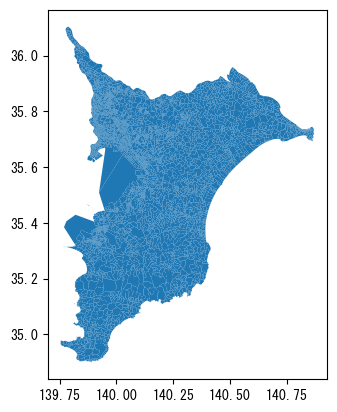

In [79]:
ax = gdf.plot()

In [80]:
# ダウンロードしたデータを読み込もう__encoding='cp932:文字化けをせずに、日本語でデータを読み取ることができる
df = pd.read_csv('data/2000/tblT000011C12.zip', encoding='cp932')

In [81]:
df

,KEY_CODE,HYOSYO,HTKSYU,CITYNAME,NAME,T000011001,T000011002,T000011003,T000011004,T000011005,T000011006,T000011007,T000011008,T000011009,T000011010
0,NaN,NaN,NaN,NaN,NaN,職業別１５歳以上就業者,Ａ 専門的・技術的職業従事者,Ｂ 管理的職業従事者,Ｃ 事務従事者,Ｄ 販売従事者,Ｅ サービス職業従事者,Ｆ 保安職業従事者,Ｇ 農林漁業作業者,Ｈ 運輸・通信従事者,Ｉ 生産工程・労務作業者
1,12101.0,1.0,0.0,中央区,NaN,83524,13413,2727,18469,14310,9066,1356,278,2898,18461
2,121010010.0,2.0,0.0,中央区,青葉町,404,125,19,131,52,16,2,1,6,45
3,121010020.0,2.0,0.0,中央区,赤井町,394,34,8,99,48,34,6,23,21,106
4,121010030.0,2.0,0.0,中央区,旭町,487,107,21,98,93,57,7,3,9,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,124720020.0,2.0,0.0,天津小湊町,小湊,551,33,5,52,75,131,3,49,81,122
6324,124720030.0,2.0,0.0,天津小湊町,天津,1890,182,39,292,242,301,19,192,82,539
6325,124720040.0,2.0,0.0,天津小湊町,浜萩,650,54,8,62,66,93,6,101,36,223
6326,124720050.0,2.0,0.0,天津小湊町,清澄,36,-,2,5,10,6,2,1,-,10


In [82]:
df= df.drop(df.index[0])

In [83]:
df.head()

,KEY_CODE,HYOSYO,HTKSYU,CITYNAME,NAME,T000011001,T000011002,T000011003,T000011004,T000011005,T000011006,T000011007,T000011008,T000011009,T000011010
1,12101.0,1.0,0.0,中央区,NaN,83524,13413,2727,18469,14310,9066,1356,278,2898,18461
2,121010010.0,2.0,0.0,中央区,青葉町,404,125,19,131,52,16,2,1,6,45
3,121010020.0,2.0,0.0,中央区,赤井町,394,34,8,99,48,34,6,23,21,106
4,121010030.0,2.0,0.0,中央区,旭町,487,107,21,98,93,57,7,3,9,78
5,121010040.0,2.0,0.0,中央区,市場町,224,37,18,28,54,35,1,-,3,40


In [84]:
df['T000011001']=pd.to_numeric(df['T000011001'],errors='coerce')
df['T000011002']=pd.to_numeric(df['T000011002'],errors='coerce')
df['T000011003']=pd.to_numeric(df['T000011003'],errors='coerce')
df['T000011004']=pd.to_numeric(df['T000011004'],errors='coerce')
df['T000011005']=pd.to_numeric(df['T000011005'],errors='coerce')
df['T000011006']=pd.to_numeric(df['T000011006'],errors='coerce')
df['T000011007']=pd.to_numeric(df['T000011007'],errors='coerce')
df['T000011008']=pd.to_numeric(df['T000011008'],errors='coerce')
df['T000011009']=pd.to_numeric(df['T000011009'],errors='coerce')
df['T000011010']=pd.to_numeric(df['T000011010'],errors='coerce')

In [85]:
df.head()

,KEY_CODE,HYOSYO,HTKSYU,CITYNAME,NAME,T000011001,T000011002,T000011003,T000011004,T000011005,T000011006,T000011007,T000011008,T000011009,T000011010
1,12101.0,1.0,0.0,中央区,NaN,83524.0,13413.0,2727.0,18469.0,14310.0,9066.0,1356.0,278.0,2898.0,18461.0
2,121010010.0,2.0,0.0,中央区,青葉町,404.0,125.0,19.0,131.0,52.0,16.0,2.0,1.0,6.0,45.0
3,121010020.0,2.0,0.0,中央区,赤井町,394.0,34.0,8.0,99.0,48.0,34.0,6.0,23.0,21.0,106.0
4,121010030.0,2.0,0.0,中央区,旭町,487.0,107.0,21.0,98.0,93.0,57.0,7.0,3.0,9.0,78.0
5,121010040.0,2.0,0.0,中央区,市場町,224.0,37.0,18.0,28.0,54.0,35.0,1.0,NaN,3.0,40.0


In [86]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6179 entries, 0 to 6178
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6179 non-null   object  
 1   PREF        6179 non-null   object  
 2   CITY        6179 non-null   object  
 3   S_AREA      6179 non-null   object  
 4   PREF_NAME   6179 non-null   object  
 5   CITY_NAME   6179 non-null   object  
 6   S_NAME      6175 non-null   object  
 7   KIGO_E      917 non-null    object  
 8   HCODE       6179 non-null   int64   
 9   AREA        6179 non-null   float64 
 10  PERIMETER   6179 non-null   float64 
 11  h12kaxx_    6179 non-null   float64 
 12  h12kaxx_ID  6179 non-null   float64 
 13  KEN         6179 non-null   object  
 14  KEN_NAME    6179 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  DUMMY1      0 non-null      float64 
 17  GST_NAME    6179 non-null   object  
 18  CSS_NAME    1887 non-null   object  
 19

In [87]:
gdf['KEY_CODE']=gdf['KEY_CODE'].astype(float)

In [88]:
gdf=gdf.merge(df,on='KEY_CODE')

In [89]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6177 non-null   float64 
 1   PREF        6177 non-null   object  
 2   CITY        6177 non-null   object  
 3   S_AREA      6177 non-null   object  
 4   PREF_NAME   6177 non-null   object  
 5   CITY_NAME   6177 non-null   object  
 6   S_NAME      6175 non-null   object  
 7   KIGO_E      917 non-null    object  
 8   HCODE       6177 non-null   int64   
 9   AREA        6177 non-null   float64 
 10  PERIMETER   6177 non-null   float64 
 11  h12kaxx_    6177 non-null   float64 
 12  h12kaxx_ID  6177 non-null   float64 
 13  KEN         6177 non-null   object  
 14  KEN_NAME    6177 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  DUMMY1      0 non-null      float64 
 17  GST_NAME    6177 non-null   object  
 18  CSS_NAME    1886 non-null   object  
 19

In [90]:
gdf.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,T000011001,T000011002,T000011003,T000011004,T000011005,T000011006,T000011007,T000011008,T000011009,T000011010
0,1.210100e+08,12,101,001000,千葉県,中央区,青葉町,NaN,8101,730719.942,...,404.0,125.0,19.0,131.0,52.0,16.0,2.0,1.0,6.0,45.0
1,1.210100e+08,12,101,002000,千葉県,中央区,赤井町,NaN,8101,1369408.223,...,394.0,34.0,8.0,99.0,48.0,34.0,6.0,23.0,21.0,106.0
2,1.210100e+08,12,101,003000,千葉県,中央区,旭町,NaN,8101,102703.034,...,487.0,107.0,21.0,98.0,93.0,57.0,7.0,3.0,9.0,78.0
3,1.210100e+08,12,101,004000,千葉県,中央区,市場町,NaN,8101,125003.477,...,224.0,37.0,18.0,28.0,54.0,35.0,1.0,NaN,3.0,40.0
4,1.210101e+10,12,101,005001,千葉県,中央区,稲荷町１丁目,NaN,8101,71670.924,...,294.0,31.0,5.0,65.0,43.0,32.0,2.0,NaN,9.0,98.0


(139.69708872425838, 140.92903876315367, 34.83887420880302, 36.16436499458835)

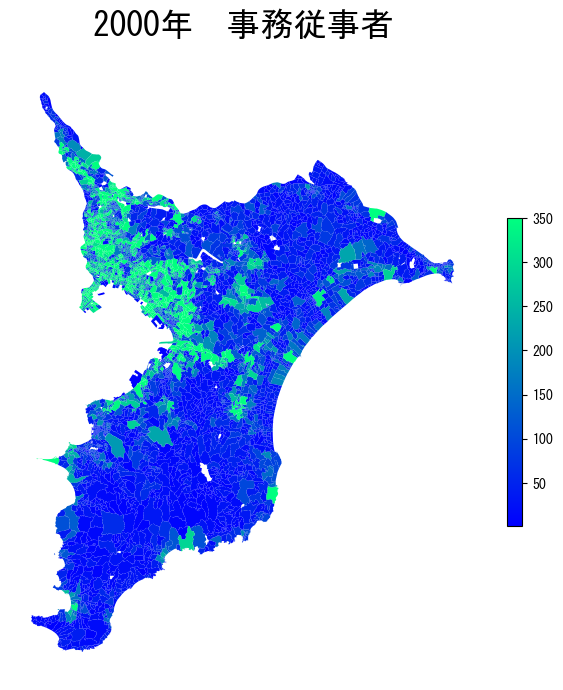

In [97]:
#Vmaxなど図の表し方は統一させる→比較するためには必要
fig,ax = plt.subplots(figsize =(8,8))

gdf.plot(ax = ax,
         column= 'T000011004',
         legend=True,
         vmax= 350,
         legend_kwds={'shrink': 0.5},
         cmap='winter'
         )
# title
ax.set_title('2000年　事務従事者',fontsize=24, pad=20)

# hide axes
ax.axis('off')

In [95]:
gdf['T000011004'].sum()

803577.0